In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [11]:
# Set paths for relevant CSV files

covid_data_path = "resources/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv"
state_code_path = "resources/US-2-letter-state-code.csv"
state_pop_path = "resources/state_population.csv"


# Import files as Pandas dataframes

covid_data_df = pd.read_csv(covid_data_path)
state_code_df = pd.read_csv(state_code_path)
state_pop_df = pd.read_csv(state_pop_path)

# View covid_data file 

covid_data_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [12]:
# Drop rows in dataframe that aren't needed for our project

clean_df = covid_data_df.drop(columns=["created_at", "consent_cases", "consent_deaths"])
clean_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0


In [13]:
#Rename columns so they are more legible to readers

clean_df = clean_df.rename(columns={"submission_date":"Submission Date", "state":"State", "tot_cases":"Total Cases",
                        "conf_cases":"Confirmed Cases", "prob_cases":"Probable Cases", "new_case":"New Cases",
                        "pnew_case":"Probable New Cases", "tot_death":"Total Deaths", "conf_death":"Confirmed Deaths",
                        "prob_death": "Probable Deaths", "new_death":"New Deaths", "pnew_death":"Probable New Deaths"})
clean_df.head()

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0


In [14]:
# Drop rows that are populated with NaNs and incomplete data 

clean_df = clean_df.dropna(how='any')
clean_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60048,09/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [15]:
clean_df['State'] = clean_df['State'].replace({'NYC': 'NY'})
clean_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60048,09/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [16]:
# consider the list

filtered_df = clean_df[(clean_df['State'] != "AS") & (clean_df['State'] != "RMI") &
                      (clean_df['State'] != "PR") & (clean_df['State'] != "PW") & 
                      (clean_df['State'] != "GU") & (clean_df['State'] != "MP") &
                      (clean_df['State'] != "FSM") & (clean_df['State'] != "VI")]
filtered_df



,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
13,10/16/2022,NY,2908749,2452178.0,456571.0,5934,1266.0,42158,36503.0,5655.0,8,-1.0
19,07/26/2021,OK,475578,373929.0,101649.0,1028,264.0,7488,6379.0,1109.0,8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60038,04/17/2021,AL,521608,407075.0,114533.0,258,75.0,11110,8878.0,2232.0,7,2.0
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [17]:
filtered_df["Submission Date"].sort_values(ascending=True)

sorted_date_df = filtered_df.sort_values("Submission Date", ascending=True)
sorted_date_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
16101,01/01/2021,WI,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0
31377,01/01/2021,OR,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0
19276,01/01/2021,IL,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0
57083,01/01/2021,OH,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0
29461,01/01/2021,MT,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47538,12/31/2021,MA,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0
9900,12/31/2021,AL,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0
29548,12/31/2021,NJ,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0
46704,12/31/2021,CO,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0


In [18]:
state_code_df =  state_code_df.rename(columns={"state_name":"State Name", "state_code":"State"}) 
state_code_df.head()

,State Name,State
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [19]:
data = {
    'State Name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
              'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
              'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
              'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
              'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'State Color': ['Red', 'Red', 'Blue', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 
              'Red', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue',
              'Blue', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue',
              'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red',
              'Blue', 'Blue', 'Blue', 'Red', 'Blue', 'Red']
}
    
    
state_color_df = pd.DataFrame(data)
state_color_df.head()

,State Name,State Color
0,Alabama,Red
1,Alaska,Red
2,Arizona,Blue
3,Arkansas,Red
4,California,Blue


In [20]:
temp_state_df = pd.merge(state_color_df, state_code_df,
                                 how='left', on='State Name')
temp_state_df.head()

,State Name,State Color,State
0,Alabama,Red,AL
1,Alaska,Red,AK
2,Arizona,Blue,AZ
3,Arkansas,Red,AR
4,California,Blue,CA


In [21]:
final_df = pd.merge(sorted_date_df, temp_state_df,
                                 how='left', on='State')
final_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color
0,01/01/2021,WI,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue
1,01/01/2021,OR,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue
2,01/01/2021,IL,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue
3,01/01/2021,OH,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red
4,01/01/2021,MT,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,MA,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue
24100,12/31/2021,AL,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red
24101,12/31/2021,NJ,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue
24102,12/31/2021,CO,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue


In [22]:
final2_df = final_df.drop(columns=["State"])
final2_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue


In [23]:
final2_df["Blue Cases"] = final2_df["Total Cases"]
final2_df["Red Cases"] = final2_df["Total Cases"]

final2_df.loc[final2_df['State Color'] == "Red", 'Blue Cases'] = 0
final2_df.loc[final2_df['State Color'] == "Blue", 'Red Cases'] = 0


In [24]:
final2_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red,0,904460
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0


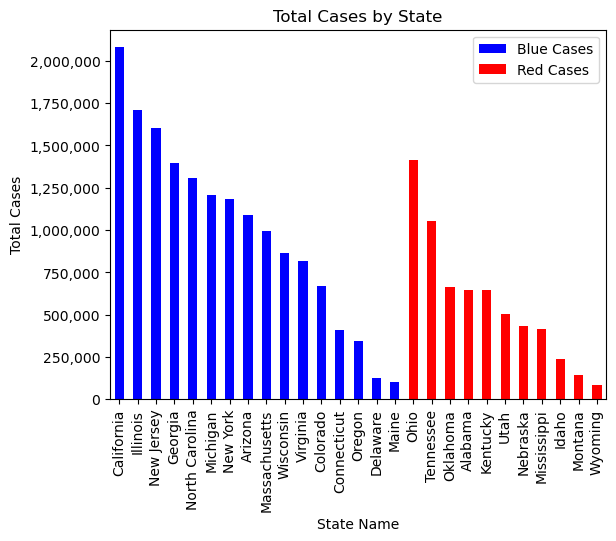

In [25]:
mean_final = final2_df.groupby("State Name")[["Blue Cases", "Red Cases"]].mean(numeric_only=True)
mean_final_df = mean_final.sort_values(by=["Blue Cases", "Red Cases"], ascending=False)

colors=["blue","red"]

mean_final_df.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                   stacked=True,
                     title="Total Cases by State",
                  color=colors)

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()

In [26]:
red_states_df = final2_df[final2_df["State Color"]=='Red']
red_states_df


,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555
5,01/01/2021,365618,298117.0,67501.0,3621,335.0,7273,5981.0,1292.0,83,19.0,Alabama,Red,0,365618
10,01/01/2021,279722,279722.0,0.0,3110,0.0,1278,1252.0,26.0,9,1.0,Utah,Red,0,279722
11,01/01/2021,585072,514429.0,70643.0,9159,1920.0,6907,5990.0,917.0,97,30.0,Tennessee,Red,0,585072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24089,12/31/2021,708938,530961.0,177977.0,0,0.0,11555,8792.0,2763.0,0,0.0,Oklahoma,Red,0,708938
24091,12/31/2021,543737,309859.0,233878.0,0,0.0,10450,6993.0,3457.0,0,0.0,Mississippi,Red,0,543737
24092,12/31/2021,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,Utah,Red,0,636992
24093,12/31/2021,342939,252799.0,90140.0,2107,930.0,3341,2783.0,558.0,0,0.0,Nebraska,Red,0,342939


In [28]:
blue_states_df = final2_df[final2_df["State Color"]=='Blue']
blue_states_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0
6,01/01/2021,350126,331664.0,18462.0,2825,221.0,4873,4221.0,652.0,59,6.0,Colorado,Blue,350126,0
7,01/01/2021,591739,543597.0,48142.0,2011,166.0,13916,13131.0,785.0,100,7.0,Michigan,Blue,591739,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,12/31/2021,1562082,1284818.0,277264.0,0,0.0,35389,30177.0,5212.0,0,0.0,New York,Blue,1562082,0
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0


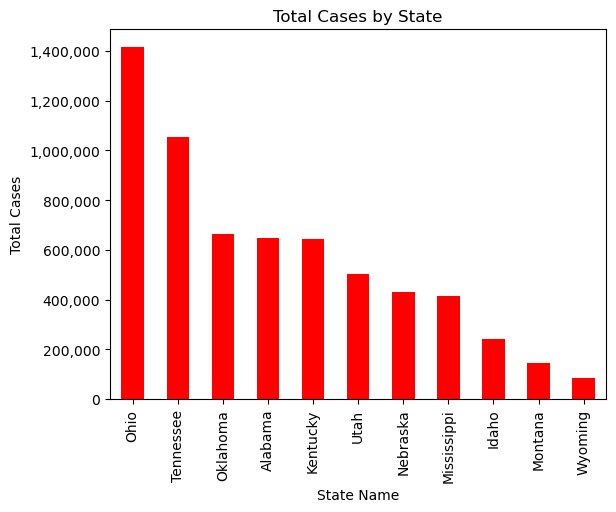

In [27]:
red_states_2 = red_states_df.groupby("State Name").mean(numeric_only=True)["Total Cases"]

red_states_mean = red_states_2.sort_values(ascending=False)

red_states_mean.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                     title="Total Cases by State",
                    color="r")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()




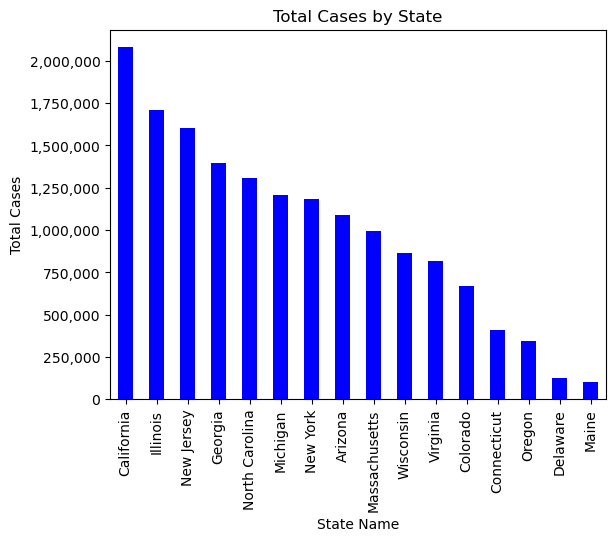

In [29]:
blue_states_2 = blue_states_df.groupby("State Name").mean(numeric_only=True)["Total Cases"]

blue_states_mean = blue_states_2.sort_values(ascending=False)

blue_states_mean.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                     title="Total Cases by State",
                    color="b")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()


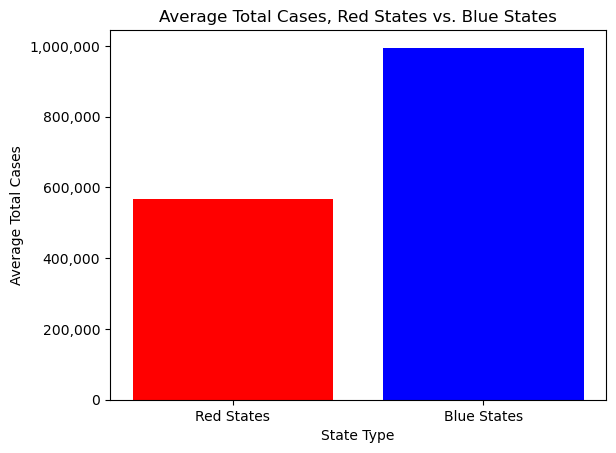

In [77]:
red_states_avg = red_states_mean.mean()
blue_states_avg = blue_states_mean.mean()

# Create a bar plot comparing the averages
averages = {"Red States": red_states_avg, "Blue States": blue_states_avg}
colors = ["r", "b"]

plt.bar(averages.keys(), averages.values(), color=colors)
plt.xlabel("State Type")
plt.ylabel("Average Total Cases")
plt.title("Average Total Cases, Red States vs. Blue States")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()



In [30]:
population_df = state_pop_df.drop(columns=["Unnamed: 2", "Unnamed: 3"])
population_df = population_df.rename(columns={"STATE":"State Name", "POP ESTIMATE 2021":"State Population"})
population_df.head()

,State Name,State Population
0,Alabama,5049846
1,Alaska,734182
2,Arizona,7264877
3,Arkansas,3028122
4,California,39142991


In [31]:
pop_state_df = pd.merge(final2_df, population_df,
                                 how='left', on='State Name')
pop_state_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases,State Population
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0,5880101
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0,4256301
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0,12686469
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380,11764342
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555,1106227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0,6989690
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red,0,904460,5049846
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0,9267961
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0,5811297


In [44]:

red_pop_state_df = pop_state_df[pop_state_df["State Color"]=="Red"]
#red_pop_state_df

red_case_pop_pct = 100 * (red_pop_state_df["Red Cases"])/(red_pop_state_df["State Population"])
#print(case_pop_pct)

red_pop_state_df["Case/Population Percentage"] = red_case_pop_pct
red_pop_state_df


/var/folders/19/n1gr34ks6yg4pzm540t1t3wm0000gn/T/ipykernel_85059/3481625288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_pop_state_df["Case/Population Percentage"] = red_case_pop_pct


,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases,State Population,Case/Population Percentage
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380,11764342,5.953414
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555,1106227,7.372357
5,01/01/2021,365618,298117.0,67501.0,3621,335.0,7273,5981.0,1292.0,83,19.0,Alabama,Red,0,365618,5049846,7.240181
10,01/01/2021,279722,279722.0,0.0,3110,0.0,1278,1252.0,26.0,9,1.0,Utah,Red,0,279722,3339113,8.377135
11,01/01/2021,585072,514429.0,70643.0,9159,1920.0,6907,5990.0,917.0,97,30.0,Tennessee,Red,0,585072,6968351,8.396133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24089,12/31/2021,708938,530961.0,177977.0,0,0.0,11555,8792.0,2763.0,0,0.0,Oklahoma,Red,0,708938,3991225,17.762416
24091,12/31/2021,543737,309859.0,233878.0,0,0.0,10450,6993.0,3457.0,0,0.0,Mississippi,Red,0,543737,2949586,18.434350
24092,12/31/2021,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,Utah,Red,0,636992,3339113,19.076683
24093,12/31/2021,342939,252799.0,90140.0,2107,930.0,3341,2783.0,558.0,0,0.0,Nebraska,Red,0,342939,1963554,17.465219


/var/folders/19/n1gr34ks6yg4pzm540t1t3wm0000gn/T/ipykernel_85059/779344121.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  red_pop_state = red_pop_state_df.groupby("State Name").mean()["Case/Population Percentage"]


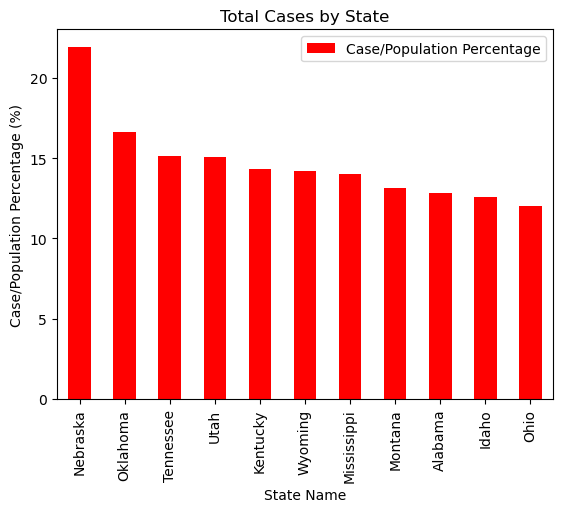

In [46]:
red_pop_state = red_pop_state_df.groupby("State Name").mean()["Case/Population Percentage"]
red_pop_state = pd.DataFrame(red_pop_state)
red_pop_state2 = red_pop_state.sort_values(by=["Case/Population Percentage"], ascending=False)


red_pop_state2.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Case/Population Percentage (%)",
                     title="Total Cases by State",
                    color="r")
plt.show()




In [47]:
blue_pop_state_df = pop_state_df[pop_state_df["State Color"]=="Blue"]

blue_case_pop_pct = 100 * (blue_pop_state_df["Blue Cases"])/(blue_pop_state_df["State Population"])

blue_pop_state_df["Case/Population Percentage"] = blue_case_pop_pct
blue_pop_state_df


/var/folders/19/n1gr34ks6yg4pzm540t1t3wm0000gn/T/ipykernel_85059/1950294325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blue_pop_state_df["Case/Population Percentage"] = blue_case_pop_pct


,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases,State Population,Case/Population Percentage
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0,5880101,8.886293
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0,4256301,2.676244
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0,12686469,7.593831
6,01/01/2021,350126,331664.0,18462.0,2825,221.0,4873,4221.0,652.0,59,6.0,Colorado,Blue,350126,0,5811297,6.024920
7,01/01/2021,591739,543597.0,48142.0,2011,166.0,13916,13131.0,785.0,100,7.0,Michigan,Blue,591739,0,10037504,5.895280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,12/31/2021,1562082,1284818.0,277264.0,0,0.0,35389,30177.0,5212.0,0,0.0,New York,Blue,1562082,0,19857492,7.866462
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0,6989690,16.318521
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0,9267961,16.878071
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0,5811297,16.479901


/var/folders/19/n1gr34ks6yg4pzm540t1t3wm0000gn/T/ipykernel_85059/1459101804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  blue_pop_state = blue_pop_state_df.groupby("State Name").mean()["Case/Population Percentage"]


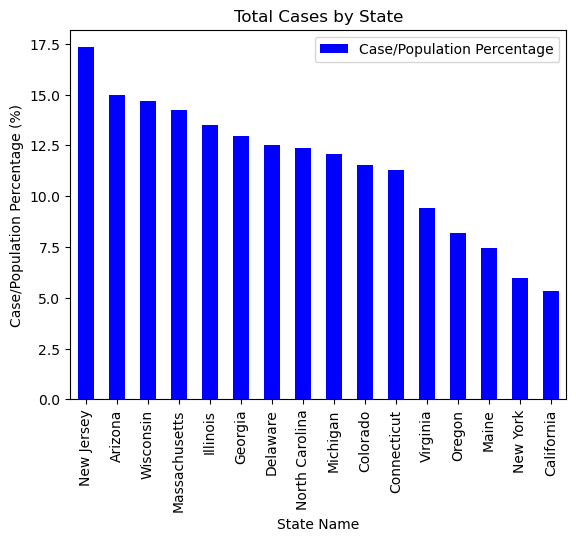

In [49]:
blue_pop_state = blue_pop_state_df.groupby("State Name").mean()["Case/Population Percentage"]
blue_pop_state = pd.DataFrame(blue_pop_state)
blue_pop_state2 = blue_pop_state.sort_values(by=["Case/Population Percentage"], ascending=False)

blue_pop_state2.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Case/Population Percentage (%)",
                     title="Total Cases by State",
                    color="b")
plt.show()




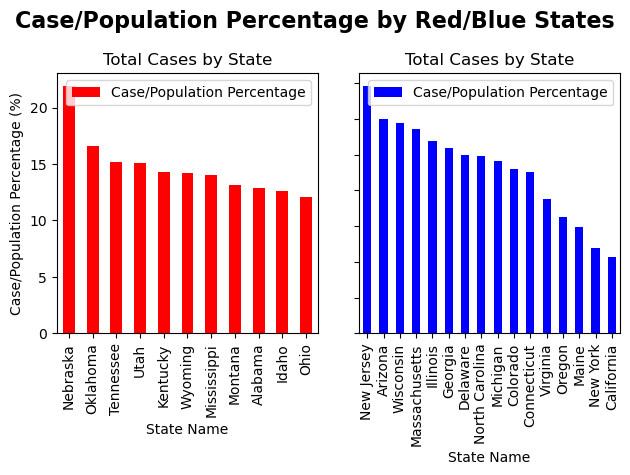

In [50]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Case/Population Percentage by Red/Blue States", fontsize=16, fontweight="bold")

red_pop_state2.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Case/Population Percentage (%)",
                     title="Total Cases by State",
                    color="r",
                  ax=ax1,
                  sharey=True)

blue_pop_state2.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Case/Population Percentage (%)",
                     title="Total Cases by State",
                    color="b",
                   ax=ax2,
                   sharey=True)

fig.tight_layout()
plt.show()

In [ ]:
red_states_avg = red_states_mean.mean()
blue_states_avg = blue_states_mean.mean()

averages = {"Red States": red_states_avg, "Blue States": blue_states_avg}
colors = ["r", "b"]

plt.bar(averages.keys(), averages.values(), color=colors)
plt.xlabel("State Type")
plt.ylabel("Average Total Cases")
plt.title("Average Total Cases, Red States vs. Blue States")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()
